In [317]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [318]:
ctmr = pd.read_csv('Mall_Customers_Clustering.csv')
ctmr

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [319]:
ctmr.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


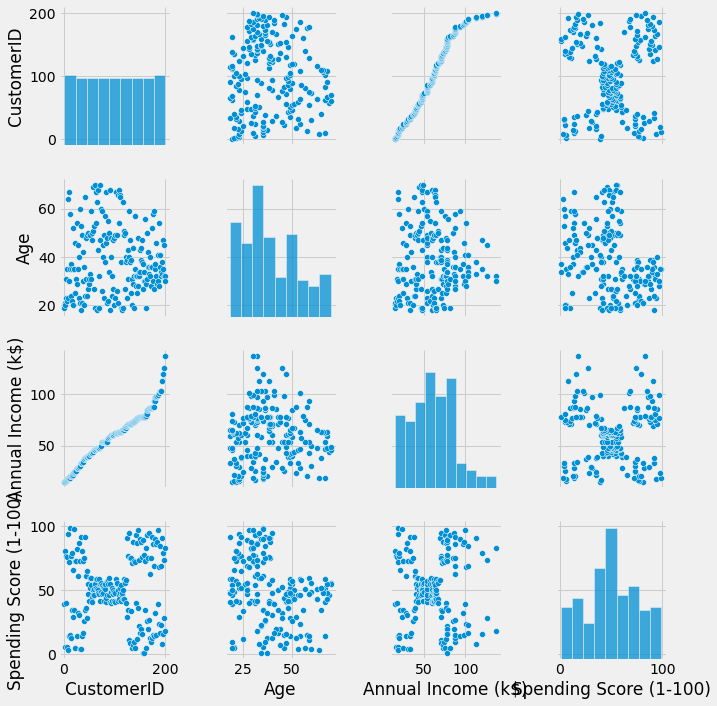

In [320]:
sns.pairplot(ctmr)
plt.show()

In [321]:
ctmr.drop(columns = ['CustomerID','Genre','Age'], inplace = True)
ctmr.dropna(inplace = True)
ctmr

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [322]:
ctmr2 = ctmr
ctmr2

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


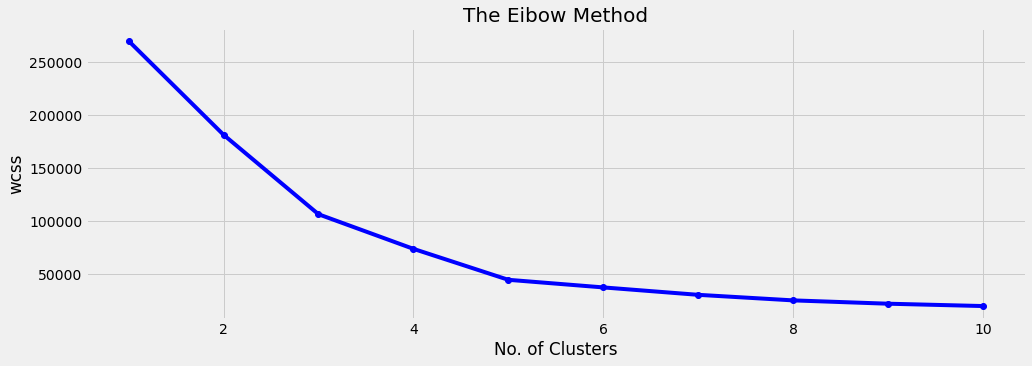

In [323]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 10)
    km.fit(ctmr)
    wcss.append(km.inertia_)

plt.figure(figsize = (15,5))
plt.plot(range(1,11), wcss, 'bo-')
plt.title('The Eibow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

# KMeans Clustering

In [324]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(ctmr)

KMeans(n_clusters=5)

In [325]:
labels = kmeans.predict(ctmr)
print(ctmr)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [326]:
centroids = kmeans.cluster_centers_
print(centroids)

[[55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [88.2        17.11428571]]


In [327]:
n_iter = kmeans.n_iter_
print(n_iter)

8


In [328]:
ctmr = ctmr.values

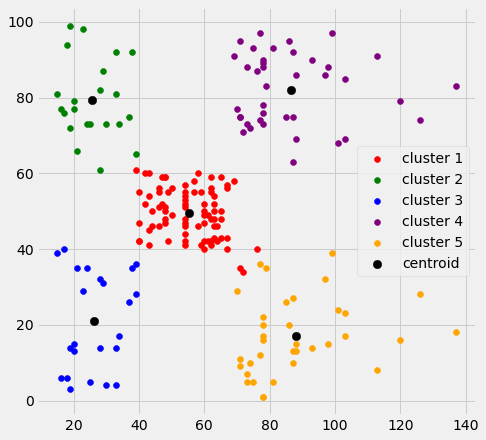

In [329]:
fig = plt.figure(figsize = (7,7))

plt.scatter(ctmr[labels == 0, 0], ctmr[labels == 0, 1], c = 'red', label = 'cluster 1')
plt.scatter(ctmr[labels == 1, 0], ctmr[labels == 1, 1], c = 'green', label = 'cluster 2')
plt.scatter(ctmr[labels == 2, 0], ctmr[labels == 2, 1], c = 'blue', label = 'cluster 3')
plt.scatter(ctmr[labels == 3, 0], ctmr[labels == 3, 1], c = 'purple', label = 'cluster 4')
plt.scatter(ctmr[labels == 4, 0], ctmr[labels == 4, 1], c = 'orange', label = 'cluster 5')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 70, c = 'black', label = 'centroid')
plt.legend()
plt.show()

# DBScan Clustering 

In [330]:
dbscan = DBSCAN(eps = 5, min_samples = 5)

In [331]:
labels = dbscan.fit_predict(ctmr2)

In [332]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [333]:
ctmr2 = ctmr2.values

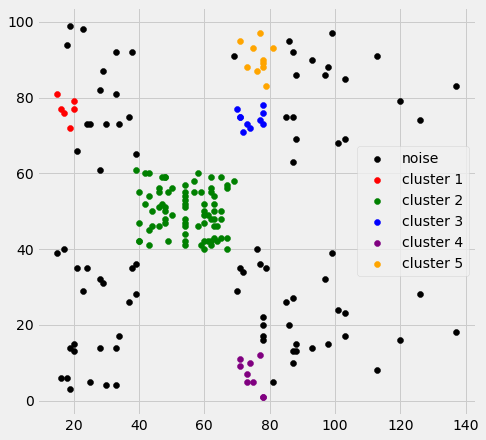

In [334]:
fig = plt.figure(figsize = (7,7))

plt.scatter(ctmr2[labels == -1, 0], ctmr2[labels == -1, 1], c = 'black', label = 'noise')
plt.scatter(ctmr2[labels == 0, 0], ctmr2[labels == 0, 1], c = 'red', label = 'cluster 1')
plt.scatter(ctmr2[labels == 1, 0], ctmr2[labels == 1, 1], c = 'green', label = 'cluster 2')
plt.scatter(ctmr2[labels == 2, 0], ctmr2[labels == 2, 1], c = 'blue', label = 'cluster 3')
plt.scatter(ctmr2[labels == 3, 0], ctmr2[labels == 3, 1], c = 'purple', label = 'cluster 4')
plt.scatter(ctmr2[labels == 4, 0], ctmr2[labels == 4, 1], c = 'orange', label = 'cluster 5')
plt.legend()
plt.show()